In [34]:
# standard library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

# local classes
os.chdir('../')
from TraversalDistance.Graph import Graph
from TraversalDistance.FreeSpaceGraph import FreeSpaceGraph
from TraversalDistance.Visualize import Visualize
from TraversalDistance.BinarySearch import BinarySearch
os.chdir('letter_data')

In [78]:
def json_to_graph(json_data):    
    graph = Graph()
    graph.name = json_data['gxl']['graph'][0]['$']['id'][0]
    
    # Extract X, Y coordinates from 'node' elements.
    for node_data in json_data['gxl']['graph'][0]['node']:
        node_id = int(node_data['$']['id'][1:])
        x_coord = float(node_data['attr'][0]['float'][0])
        y_coord = float(node_data['attr'][1]['float'][0])
        graph.addNode(node_id, x_coord, y_coord)

    # Extract edges from 'edge' elements.
    for i, edge_data in enumerate(json_data['gxl']['graph'][0]['edge'], 1):
        from_node = int(edge_data['$']['from'][1:])
        to_node = int(edge_data['$']['to'][1:])
        graph.connectTwoNodes(i, from_node, to_node)
        
    return (graph.name, graph)

In [79]:
file_names = os.listdir("LOW")
graphs = list()

for file_name in file_names:
    if file_name.endswith('.json'):
        try:
            json_graph = json.load(open(f"LOW/{file_name}"))
            graph = json_to_graph(json_graph)
            graphs.append(graph)
        except: pass

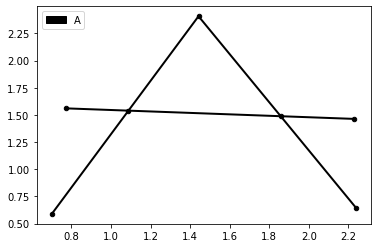

In [76]:
graphs[1].Plot2MatPlotLib()

In [96]:
# Sample
g1, g2 = graphs[4][1], graphs[19][1]

# comparing two identical graphs
binary_search = BinarySearch(g1, g1, left=0, right=5, precision=0.1)
epsilon = binary_search.search()
print("Computing graph_1 by graph_1 (traversed) minimum epsilon:", epsilon)

# comparing graph two and graph one
binary_search = BinarySearch(g1, g2, left=0, right=5, precision=0.1)
epsilon = binary_search.search()
print("Computing graph_2 by graph_1 (traversed) minimum epsilon:", epsilon)

# comparing graph one and graph two
binary_search = BinarySearch(g2, g1, left=0, right=5, precision=0.1)
epsilon = binary_search.search()
print("Computing graph_1 by graph_2 (traversed) minimum epsilon:", epsilon)

Computing graph_1 by graph_1 (traversed) minimum epsilon: 0.078125
Computing graph_2 by graph_1 (traversed) minimum epsilon: 0.625
Computing graph_1 by graph_2 (traversed) minimum epsilon: 0.625


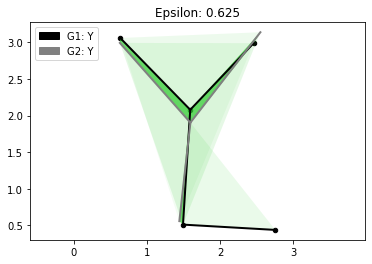

In [97]:
visual = Visualize(g1, g2, epsilon=epsilon)
visual.plot_freespace()